In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys



# Percorsi dei dati
PROCESSED_DATA_PATH = 'c:\\Users\\luigi\\OneDrive\\Desktop\\Progetto Intelligent Web\\FilmInsight\\data\\processed'

In [2]:
sys.path.append(os.path.join(os.getcwd(), 'c:\\Users\\luigi\\OneDrive\\Desktop\\Progetto Intelligent Web\\FilmInsight\\src'))
from utils import ensure_directory_exists

def load_processed_data():
    """Carica i file processati con gestione errori."""
    try:
        movies = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, "movies_processed.csv"))
        ratings = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, "ratings_processed.csv"))
        tags = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, "tags_processed.csv"))
    except FileNotFoundError as e:
        print(f"Errore: {e}")
        print("Assicurati che i file processati esistano nella directory corretta.")
        return None, None, None
    return movies, ratings, tags


In [3]:
def plot_genre_distribution(movies, top_n=10, exclude=['Documentary', 'Short']):
    """Plotta la distribuzione dei generi escludendo alcuni generi meno significativi."""
    genres = movies['genres'].explode()  # Divide i generi in singole righe
    genres = genres[~genres.isin(exclude)]  # Escludi alcuni generi
    genre_counts = genres.value_counts()  # Conta i generi
    
    # Mostra solo i primi `top_n` generi
    top_genres = genre_counts.head(top_n)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_genres.index, y=top_genres.values, palette="viridis")
    plt.title(f"Distribuzione dei Generi nei Film (Top {top_n}, N={len(genres)})")
    plt.xlabel("Generi")
    plt.ylabel("Frequenza")
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Salva il grafico
    ensure_directory_exists("data/plots")
    plt.savefig("data/plots/genre_distribution.png")
    plt.show()



In [4]:
def plot_rating_distribution(ratings):
    """Plotta la distribuzione delle valutazioni."""
    plt.figure(figsize=(8, 6))
    sns.histplot(ratings['rating'], bins=10, kde=True, color="skyblue")
    plt.title("Distribuzione delle Valutazioni")
    plt.xlabel("Valutazione")
    plt.ylabel("Frequenza")
    plt.show()


In [5]:
def plot_top_rated_movies(movies, ratings, top_n=10):
    """Mostra i film con il rating medio più alto."""
    avg_ratings = ratings.groupby('movieId')['rating'].mean()
    top_rated = avg_ratings.nlargest(top_n).reset_index()
    top_rated = pd.merge(top_rated, movies, on="movieId")
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_rated['rating'], y=top_rated['title'], palette="coolwarm")
    plt.title(f"Top {top_n} Film con il Rating Medio Più Alto")
    plt.xlabel("Rating Medio")
    plt.ylabel("Film")
    plt.tight_layout()
    plt.show()

In [6]:
def plot_tags_distribution(tags):
    """Plotta la distribuzione dei tag."""
    tag_counts = tags['tag'].value_counts().head(20)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=tag_counts.values, y=tag_counts.index, palette="plasma")
    plt.title("Distribuzione dei Tag (Top 20)")
    plt.xlabel("Frequenza")
    plt.ylabel("Tag")
    plt.tight_layout()
    plt.show()

Caricamento dei dati...
Plotting la distribuzione dei generi...


C:\Users\luigi\AppData\Local\Temp\ipykernel_4772\3394743927.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette="viridis")


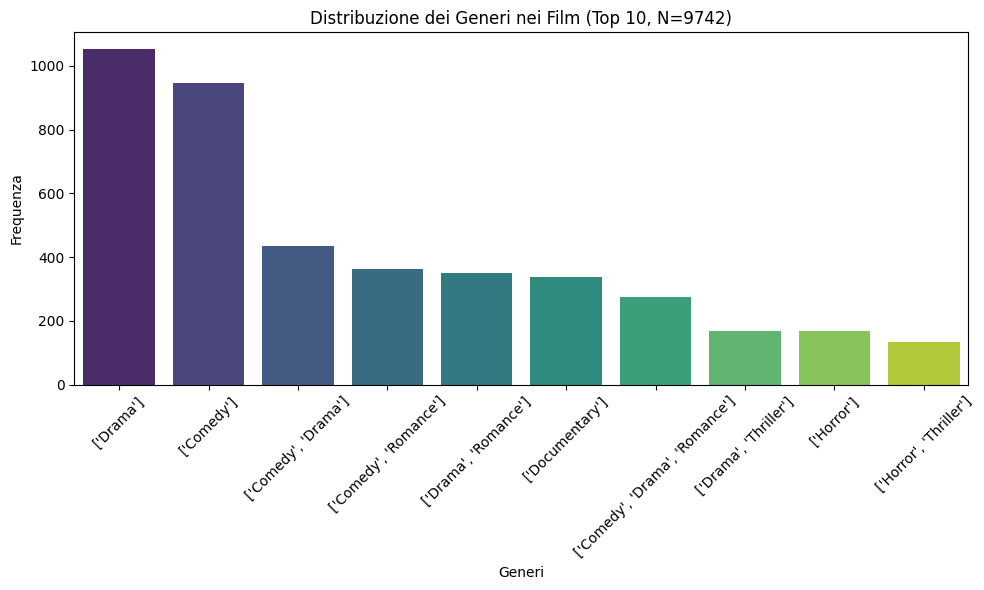

Plotting la distribuzione delle valutazioni...


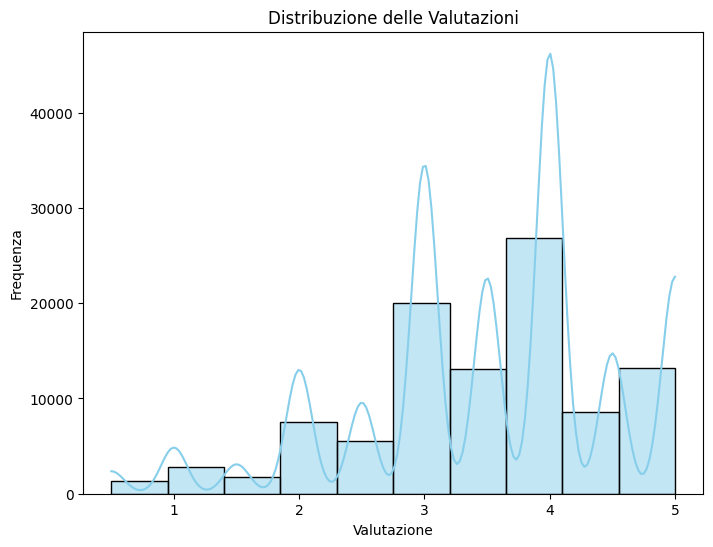

Plotting i film con il rating medio più alto...


C:\Users\luigi\AppData\Local\Temp\ipykernel_4772\598908545.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated['rating'], y=top_rated['title'], palette="coolwarm")


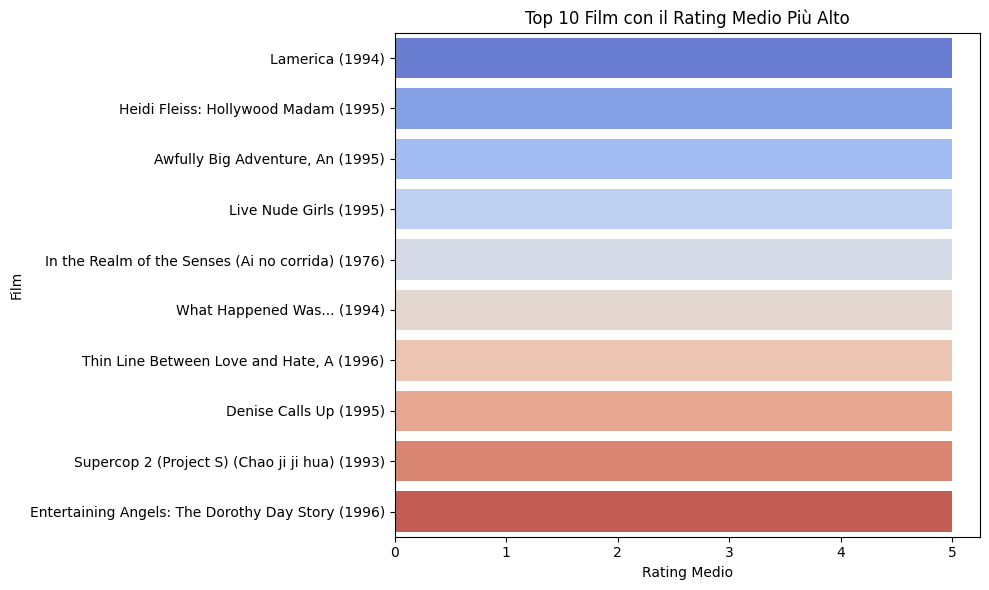

Plotting la distribuzione dei tag...


C:\Users\luigi\AppData\Local\Temp\ipykernel_4772\997165441.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tag_counts.values, y=tag_counts.index, palette="plasma")


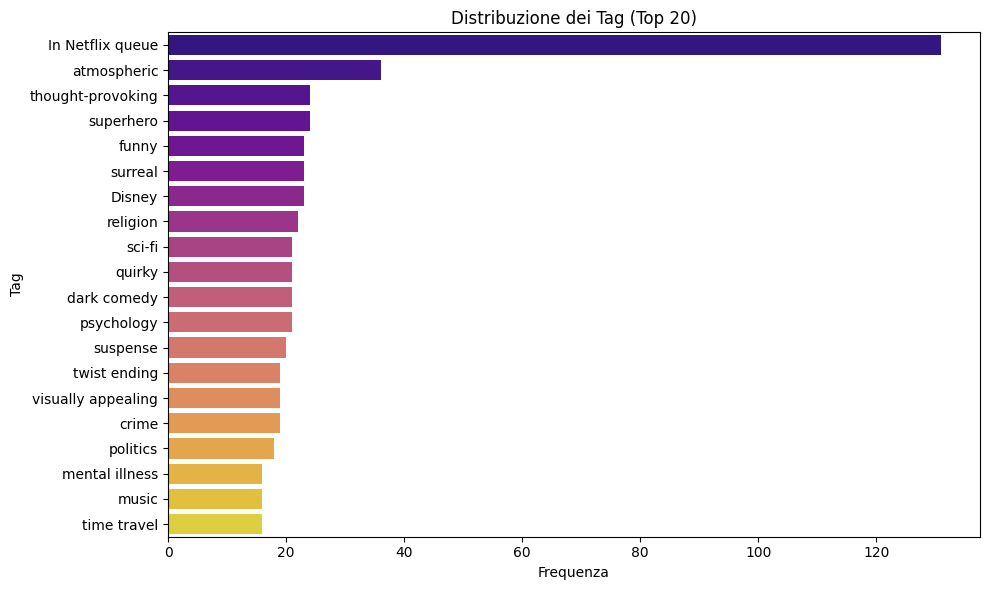

In [7]:
def run_eda():
    """Esegue l'analisi esplorativa."""
    print("Caricamento dei dati...")
    movies, ratings, tags = load_processed_data()
    
    if movies is None or ratings is None or tags is None:
        print("Analisi esplorativa terminata. I dati non sono stati caricati correttamente.")
        return
    
    print("Plotting la distribuzione dei generi...")
    plot_genre_distribution(movies)
    
    print("Plotting la distribuzione delle valutazioni...")
    plot_rating_distribution(ratings)
    
    print("Plotting i film con il rating medio più alto...")
    plot_top_rated_movies(movies, ratings)
    
    print("Plotting la distribuzione dei tag...")
    plot_tags_distribution(tags)


if __name__ == "__main__":
    run_eda()